# Repaso de Señales y Sistemas

## carga de librerias

In [215]:
#librerias 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.signal import convolve,correlate,iirnotch,filtfilt,cheby2,cheby1,butter,freqz

## Diccionarios

In [5]:
print("hola luca")

pei ano 


In [216]:
a = {'messi':19,
     'cristiano': 7}

In [217]:
a['messi']

19

In [218]:
sujeto1 = {'eeg': [],
           'ecg': []}

## f-Strings

In [219]:
print('Messi tiene la', a['messi'])

Messi tiene la 19


In [220]:
print(f"Messi tiene la {a['messi']}")

Messi tiene la 19


## Librerías a utilizar

Hay 3 librerías de base  que vamos a trabajar durante toda la materia:

1. [**Numpy:**](https://numpy.org/) Permite crear vectores y matrices de altas dimensiones, junto con una gran colección de funciones matemáticas de alto nivel para operar con estas matrices.

<img src="https://aprendeconalf.es/docencia/python/manual/img/numpy-logo.png" width="400">

2. [**Matplotlib:**](https://matplotlib.org/) Para crear visualizaciones estáticas, animadas e interactivas de un conjunto de datos.

<img src="https://camo.githubusercontent.com/55a55cebad6360bda8bca520c61e0e195dc7ee413bf9982f1ba86cab496f2388/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f7374617469632f6c6f676f322e737667" width="400">

3. [**Scipy:**](https://scipy.org/) Proporciona algoritmos para optimización, integración, interpolación, problemas de valores propios, ecuaciones algebraicas, ecuaciones diferenciales, estadísticas y lo que más nos interesa: sus aplicaciones para el procesamiento de señales digitales.

<img src="https://www.fullstackpython.com/img/logos/scipy.png" width="400">



Los/as invito a entrar a cada link y chusmear la documentación de cada una de estas librerías como para estar familiarizados con ellas y los módulos que contienen.

### Numpy

El objeto principal de _NumPy_ es una matriz multidimensional homogénea, es decir, un vector de elementos, todos del mismo tipo, indexados por una tupla de enteros no negativos.

En NumPy las dimensiones se llaman ejes, por eso a las filas les vamos a llamar `axis=0` y a las columnas `axis=1`.

In [221]:
arr = np.array([[1., 0., 0.],[0., 1., 2.]])
arr

array([[1., 0., 0.],
       [0., 1., 2.]])

In [222]:
type(arr)

numpy.ndarray

Los atributos más importantes de los objetos `ndarray` son:

In [223]:
# ndim
print(f'arr.dim = {arr.ndim}')

# shape
print(f'arr.shape = {arr.shape}')

# size
print(f'arr.size = {arr.size}')

# dtype
print(f'arr.dtype = {arr.dtype}')

# itemsize
print(f'arr.itemsize = {arr.itemsize}')

# data
print(f'arr.data = {arr.data}')

arr.dim = 2
arr.shape = (2, 3)
arr.size = 6
arr.dtype = float64
arr.itemsize = 8
arr.data = <memory at 0x000001605EA2D490>


#### Array creation

In [224]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [225]:
np.ones((6,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

¿Qué pasa si multiplico un vector por un escalar?

In [226]:
np.array([1,2,3])*2

array([2, 4, 6])

In [227]:
# ¿Cómo hago una matriz de 2s (twos())?

In [228]:
def twos(s):
  return np.ones(s)*2

In [229]:
twos(5)

array([2., 2., 2., 2., 2.])

In [230]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [231]:
np.linspace(0,10,20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [232]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [233]:
# TAREA:
# Hacer con arange y linspace un vector de tiempo que acompañe a una señal de duración L y frecuencia de muestreo fs
L = 8
fs = 4
Ts = 1/fs
#En una longitud L genero un valor cada Ts = 1/fs segundos, para alcanzar el valor L tengo que tener en cuenta que llega hasta el valor maximo - el paso
#por lo tanto mi valor maximo sera L + Ts
#hay que tener en cuenta si L es divisible por Ts, si lo es tendremos como valor final L (por lo tanto usaremos L+Ts como parametro)
#Si no es divisible no pasaremos de L por lo tanto usaremos simplemente L
#hay que tener en cuenta si fs es mayor a 1, ya que sino no tiene sentido hablar del resto entre L y Ts, si Fs fuera mayor a 1, Ts seria menor a 1
if(L%Ts == 0 or fs > 1):
    ta = np.arange(0,L + Ts, Ts)
    tb = np.linspace(0,L,int(L*fs +1))
elif(L%Ts != 0):
    ta = np.arange(0,L, Ts)
    tb = np.linspace(0,L-L%Ts,int(L*fs +1))
print(ta)
print(tb)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.  ]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.  ]


#### Constants

In [234]:
np.e

2.718281828459045

In [235]:
np.pi

3.141592653589793

#### Mathematical functions

[Documentación](https://numpy.org/doc/stable/reference/routines.math.html)

In [236]:
np.sin(np.pi/2)

np.float64(1.0)

In [237]:
np.cos(0)

np.float64(1.0)

In [238]:
np.floor(np.pi)

np.float64(3.0)

In [239]:
np.ceil(np.pi)

np.float64(4.0)

In [240]:
print(np.sum([[0, 1], [0, 5]], axis=0))

print(np.sum([[0, 1], [0, 5]], axis=1))

print(np.sum([[0, 1], [0, 5]]))

[0 6]
[1 5]
6


In [241]:
np.sqrt(121)

np.float64(11.0)

### Matplotlib

El comando básico para graficar es [plt.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) que puede generar el gráfico de una función continua, es decir, relacionar dos set de datos de la misma longitud y unir esos puntos de datos en el gráfico.


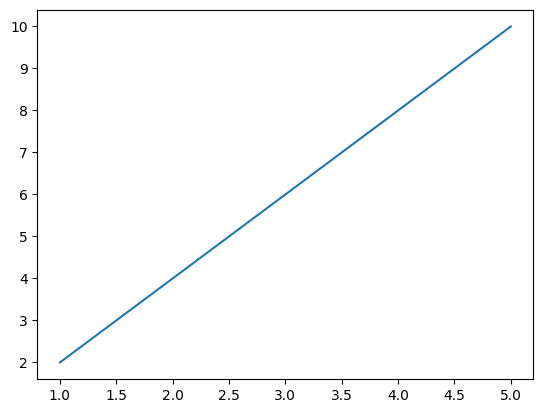

In [242]:
x = [1, 2, 3, 4, 5]
y = [2*i for i in x]

plt.plot(x,y)
plt.show()

In [243]:
x

[1, 2, 3, 4, 5]

Ya que es posible incluír muchas curvas sobre el mismo gráfico, Matplotlib espera a que se termine de generar cada gráfico y al final de todo debemos llamar a [plt.show()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) para mostrar todas las curvas generadas.

In [244]:
a

{'messi': 19, 'cristiano': 7}

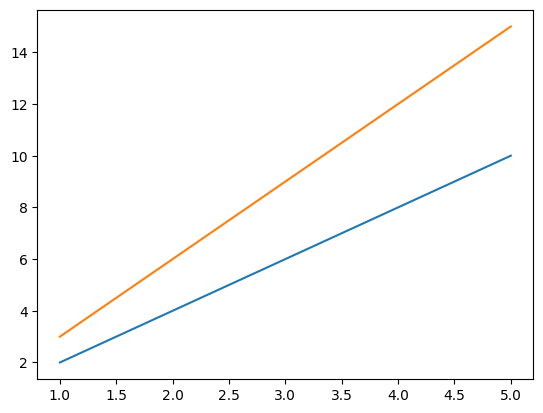

In [245]:
# Sin plt.show

x = [1, 2, 3, 4, 5]
y1 = [2*i for i in x]
y2 = [3*i for i in x]

plt.plot(x,y1)
plt.plot(x,y2)

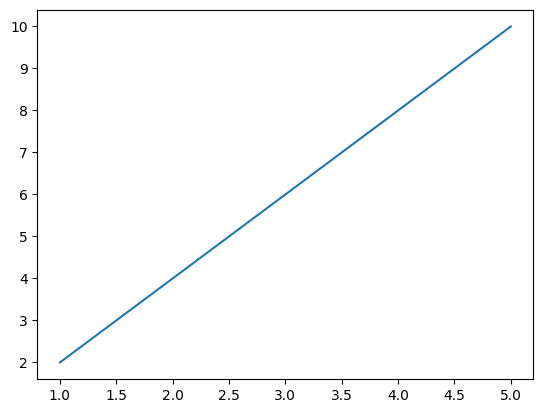

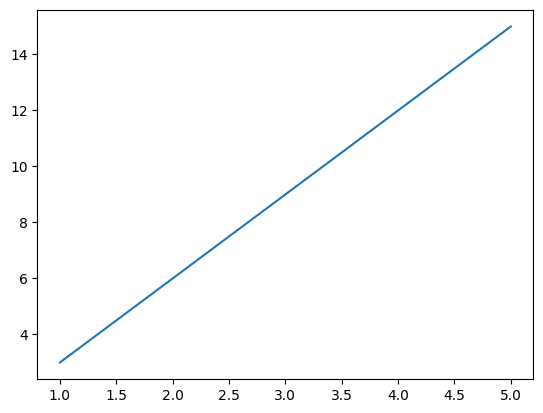

In [246]:
# Con plt.show()

x = [1, 2, 3, 4, 5]
y1 = [2*i for i in x]
y2 = [3*i for i in x]

plt.plot(x,y1)
plt.show()

plt.plot(x,y2)
plt.show()

Se puede agregar un tercer comando dentro de `plt.plot()` acerca del color y la traza de los datos.

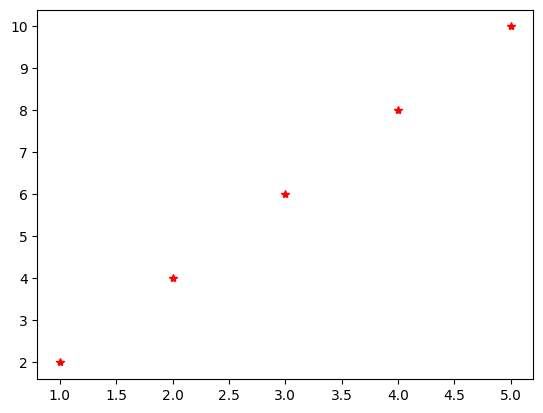

In [247]:
# En este caso por ejemplo "r" es de red y "*" undica que se va a poner un asterisco en vez de unir los puntos
plt.plot(x,y,'r*')
plt.show()

Otros ejemplos

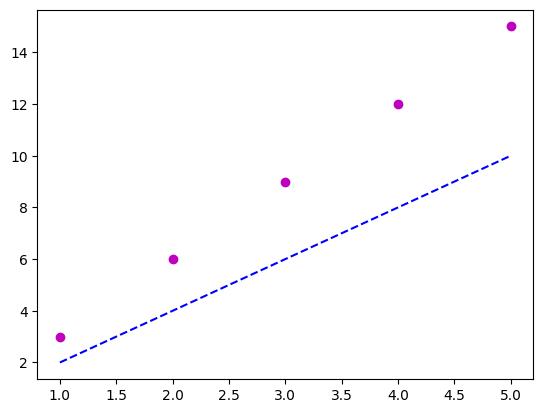

In [248]:
plt.plot(x,y2,'mo') # Magenta con puntos

plt.plot(x,y1,'b--') # Azul linea punteada

plt.show()

Para identificar cada gráfico se les puede colocar un label que los caracterice:

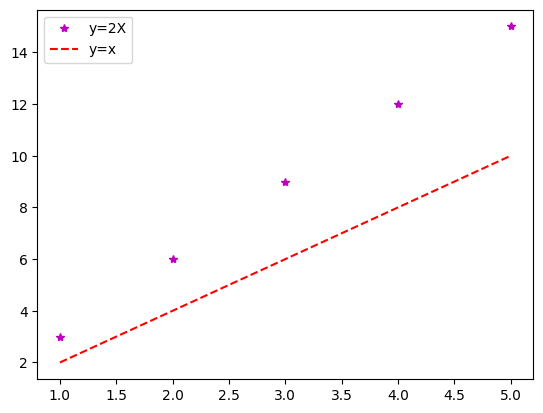

In [249]:
plt.plot(x,y2,'m*', label = 'y=2X') # Magenta con estrellas + label
plt.plot(x,y1,'r--', label= 'y=x') # Rojo linea punteada + label

plt.legend() # Necesitamos de este comando para que se grafique la leyenda que explique las diferencias de los labels que puse
plt.show()

Puedo modificar el tamaño de estos gráficos:

In [250]:
plt.figure(figsize=(8,10))

<Figure size 800x1000 with 0 Axes>

<Figure size 800x1000 with 0 Axes>

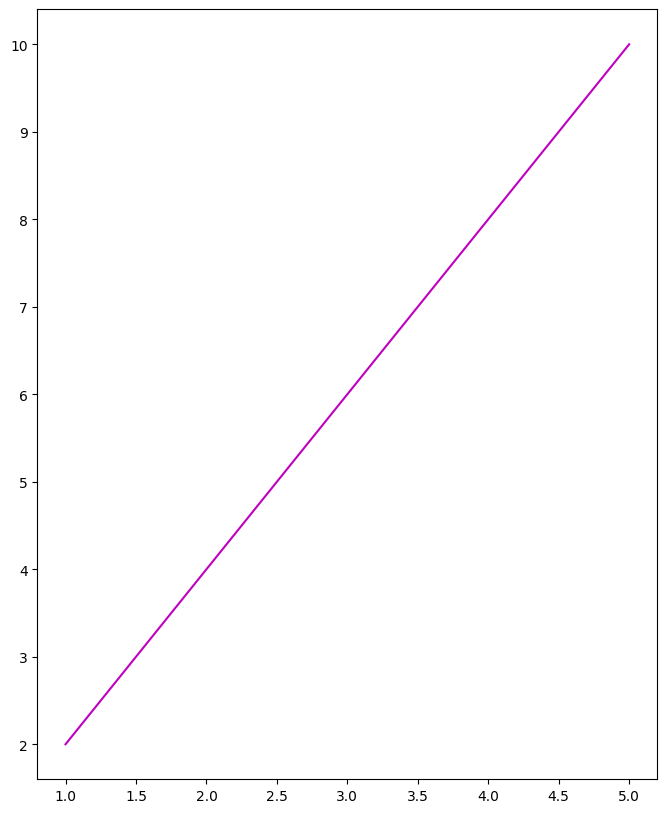

In [251]:
plt.figure(figsize=(8,10))
plt.plot(x,y,'m')
plt.show()

También puedo agregarle nombre a los ejes, una grilla y un título:

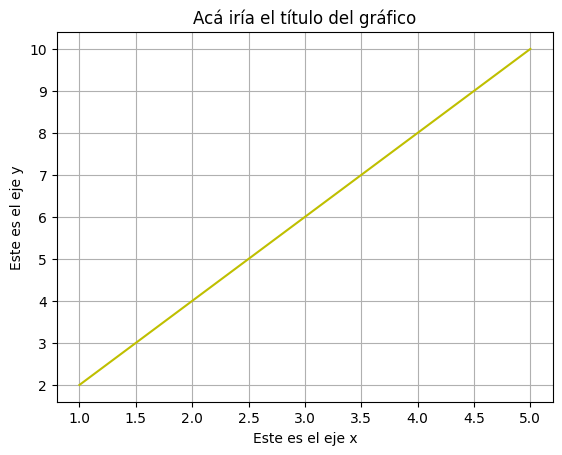

In [252]:
plt.figure()
plt.plot(x,y,'y')
plt.xlabel('Este es el eje x')
plt.ylabel('Este es el eje y')
plt.grid()
plt.title('Acá iría el título del gráfico')
plt.show()

Se pueden también hacer gráficos con `subplots` de la siguiente manera:

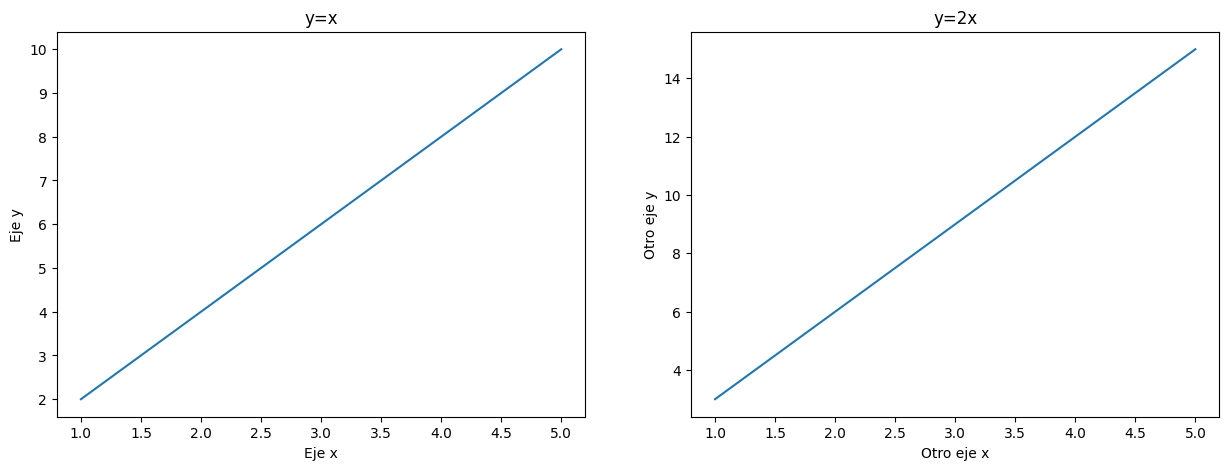

In [253]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5)) # Quiero 2 subplots (1 fila, 2 columnas)

ax0.plot(x, y1)
ax0.set_xlabel('Eje x')
ax0.set_ylabel('Eje y')
ax0.set_title('y=x')

ax1.plot(x, y2)
ax1.set_xlabel('Otro eje x')
ax1.set_ylabel('Otro eje y')
ax1.set_title('y=2x')

plt.show()

En esta tabla pueden ver distintos colores y tipos de líneas que se pueden realizar con matplotlib:





<img src="https://github.com/IEEESBITBA/Curso-Python/blob/master/_assets/ColoresLineas.png?raw=True" height="600px">

## Carga del ECG

### Scipy

* scipy.cluster

* scipy.constants

* scipy.datasets

* ***scipy.fft*** ✅

* scipy.fftpack

* scipy.integrate

* scipy.interpolate

* ***scipy.io*** ✅

* scipy.linalg

* scipy.misc

* scipy.ndimage

* scipy.odr

* scipy.optimize

* ***scipy.signal*** ✅

* scipy.sparse

* scipy.spatial

* scipy.special

* scipy.stats

#### Input and output (`scipy.io`)

[Documentación](https://docs.scipy.org/doc/scipy/reference/io.html)

Vamos a tener que poder leer y acceder a varios tipos de archivos, pero principalmente son archivos en formato ".mat" por ende debemos cargarlos de la siguiente forma:



```
import scipy.io

data = scipy.io.loadmat('ruta_y_nombre_del_archivo.mat')
```



Los archivos cargados son diccionarios con el nombre de las variables internas como keys del diccionario. (Para más info sobre los parámetros de esta función ingrese [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).

En el siguiente código les aclaramos cómo pueden leer los distintos keys de una señal en formato ".mat"

In [254]:
## /content/drive/MyDrive/Clase ECG - Señales/ecg50hz.mat

In [255]:
# https://drive.google.com/file/d/1gEWC8VMP3o7_5dOIEzHwRj_pMJNDcHZZ/view?usp=sharing

In [256]:
#/content/drive/MyDrive/ecg50hz.mat

In [257]:
a.keys()

dict_keys(['messi', 'cristiano'])

In [258]:
path = r'C:\Users\Juan Bautista\.vscode\PSIB\Repaso\ecg50hz.mat'
data = scipy.io.loadmat(path)
print(sorted(data.keys())) #Esto les permite ver qué hay adentro del archivo

['D1', 'D2', 'D3', '__globals__', '__header__', '__version__', 'sampling']


In [259]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'D1', 'D2', 'D3', 'sampling'])

In [260]:
data['sampling'][0][0]

np.uint16(400)

In [261]:
fs = data['sampling'][0][0]
print(fs)

400


In [262]:
data['D1'].shape

(5633, 1)

In [263]:
D1 = np.ravel(data['D1'])

In [264]:
t_total = len(D1) / fs
N = len(D1)
t = np.linspace(0, t_total, N)

## TAREA:

Eliminar el ruido de baja frecuencia y de alta frecuencia de la señal ecg50Hz.mat

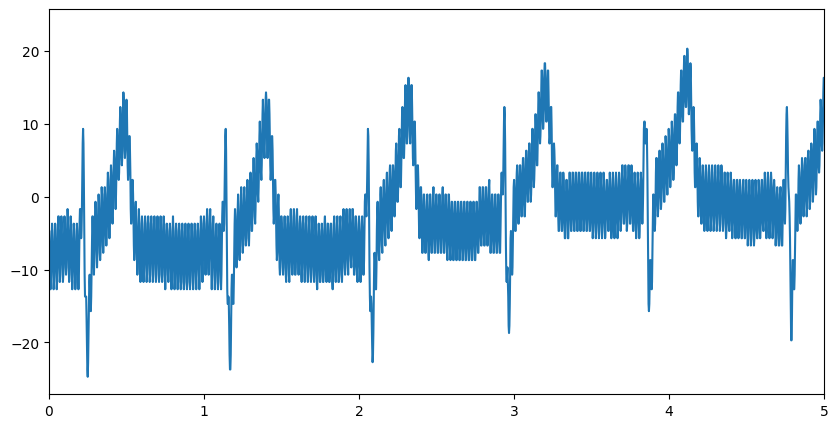

In [265]:
plt.figure(figsize=(10,5))
plt.plot(t,D1)
plt.xlim([0,5])
plt.show()

Primero voy a aplicar la transformada dde fourier para hacer un analisis espectral de la señal y ver que me interesa filtrar y que no


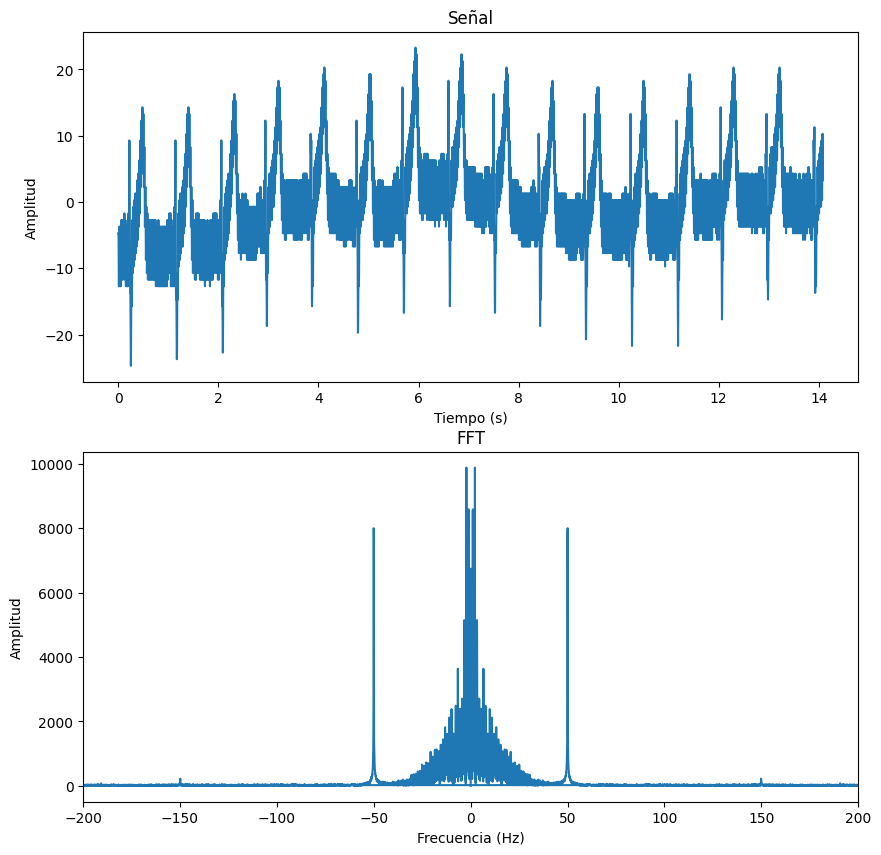

In [266]:
fs = 400
t_total = len(D1) / fs
N = len(D1)
t = np.linspace(0, t_total, N)

# Calculamos la DFT y la FFT de la señal
fft = np.abs(np.fft.fft(D1))
freq_fft = np.fft.fftfreq(len(D1), t[1] - t[0])

# Graficamos

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 10))

ax0.plot(t, D1)
ax0.set_xlabel('Tiempo (s)')
ax0.set_ylabel('Amplitud')
ax0.set_title('Señal')

ax1.plot(freq_fft, fft)
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Amplitud')
ax1.set_title('FFT')
ax1.set_xlim([-200,200])

plt.show()

Podemos notar como en 50 Hz existe un pico, es muy posivle que se deba al ruido electrico del ionstrumental. Vamos a eliminarlo primero usando un filtro rechaza-banda de tipo notch

In [267]:
W0 = 50
Q = 2
b,a = signal.iirnotch(W0,Q,fs = 400)
D1_50Hz = filtfilt(b,a,D1)

Graficamos tanto la señal filtrada como su transformada de fourier


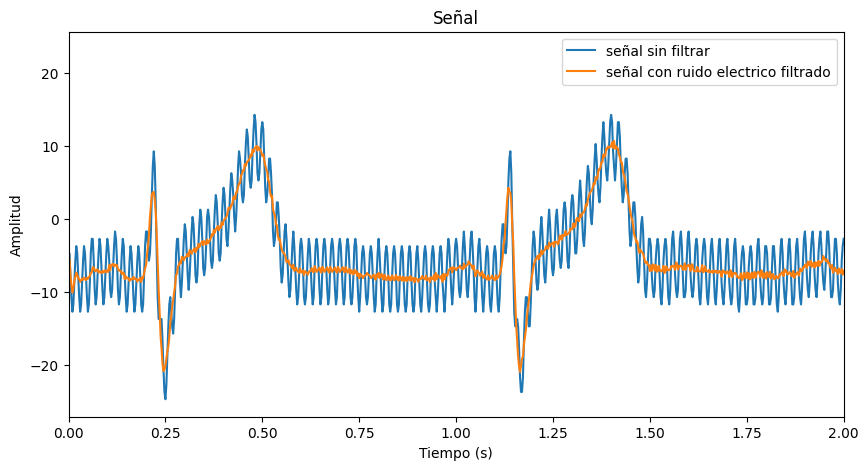

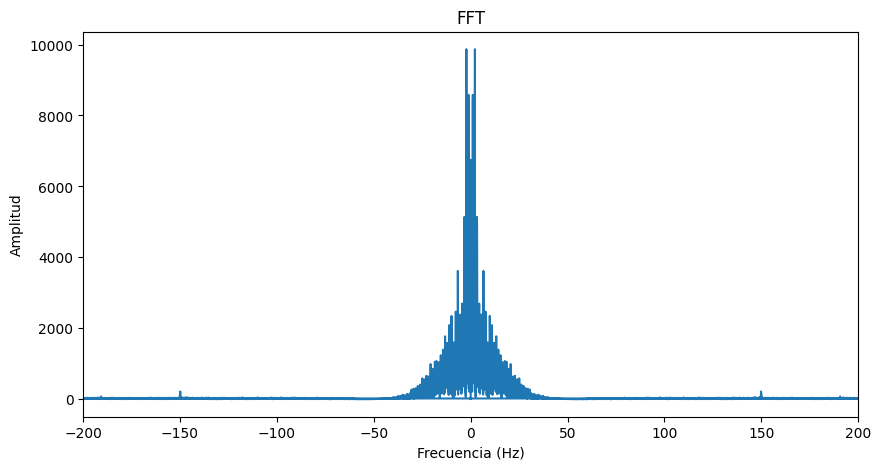

In [268]:
fft = np.abs(np.fft.fft(D1_50Hz))
freq_fft = np.fft.fftfreq(len(D1_50Hz), t[1] - t[0])

# Graficamos
plt.figure(figsize=(10,5))
plt.plot(t, D1,label = "señal sin filtrar")
plt.plot(t, D1_50Hz,label ="señal con ruido electrico filtrado")
plt.xlim([0,2])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(freq_fft, fft)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT')
plt.xlim([-200,200])

plt.show()

Se puede observar claramente como el filtro elimino gran parte del ruido o "pasto" de la señal, por otro lado al momento de graficar el espectro de la señal filtrada desaparecieron los picos en 50 Hz. Ahora tocara filtrar la señal en sus frecuencias bajas y altas. 

Encontre un trabajo que explicaba que frecuencias serian utiles filtrar. 

En el mismo esta escrito que: "Las frecuencias por debajo de 0.05 [Hz] son frecuencias bajas causadas por algún
movimiento del paciente (respiración, movimiento muscular de extremidades, etc.) y
por algunas fuentes de ruido ambiental de baja frecuencia (por ejemplo movimiento de
personas alrededor del paciente), además también están presentes niveles de voltaje
de DC causados por pequeñas diferencias de cargas eléctricas entre la piel y cada
uno de los electrodos" 

Por lo tanto vamos a diseñar un filtro pasa-altos que elimine las frecuencias menores a 0.05 Hz


C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_16556\3034408671.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


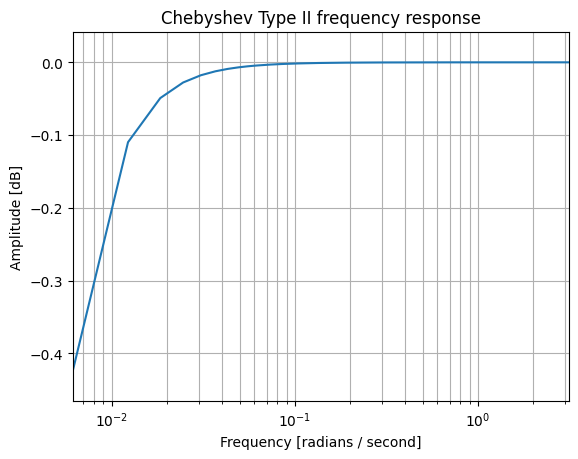

In [269]:
fs = 400
N = 1
rs = 40
ws = .5
wa = ws/fs

b,a = cheby2(N,rs,wa,btype = 'high',analog =False, fs=fs)
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_16556\1108726538.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


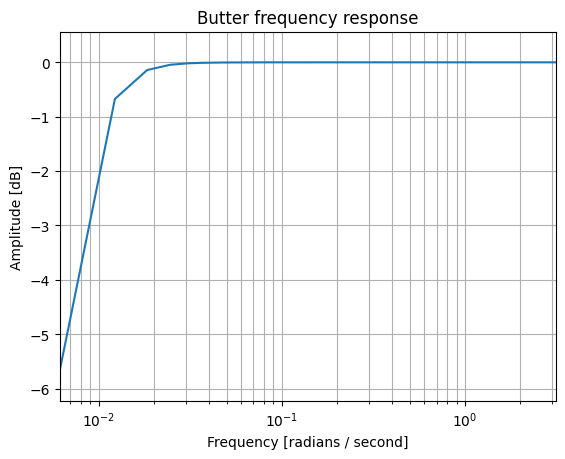

In [270]:
fs = 400
N = 2
rs = 40
wa = .5
btype = 'highpass'
b,a = butter(N,wa,btype = 'high',analog = False , fs = fs)
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

Me quedo con butter, filtra de manera mas abrupta por lo tanto pierdo menos informacion

In [271]:
D1_High = filtfilt(b,a,D1_50Hz)

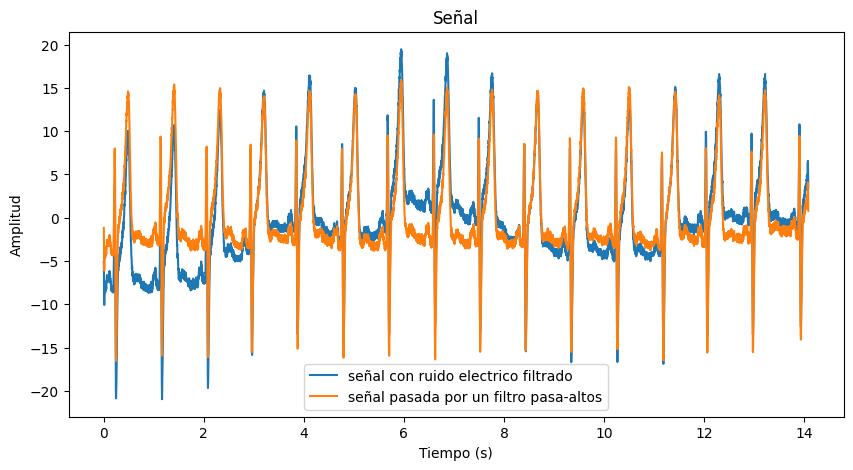

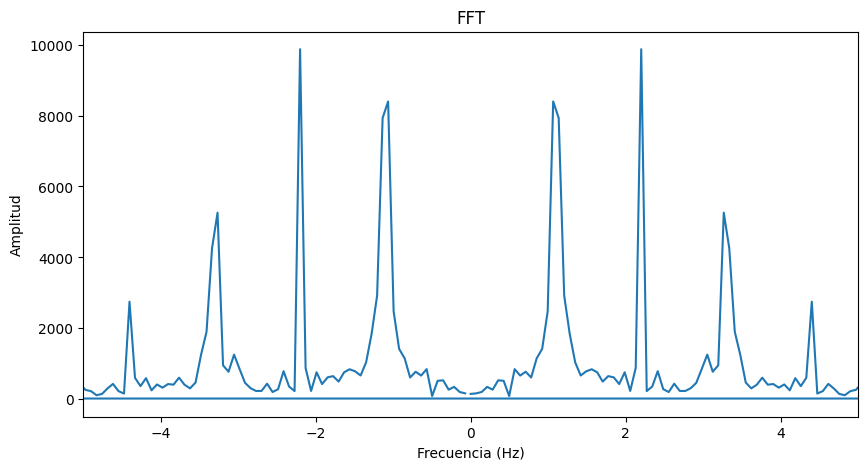

In [272]:
fft = np.abs(np.fft.fft(D1_High))
freq_fft = np.fft.fftfreq(len(D1_High), t[1] - t[0])

# Graficamos
plt.figure(figsize=(10,5))
plt.plot(t, D1_50Hz,label ="señal con ruido electrico filtrado")
plt.plot(t,D1_High, label = "señal pasada por un filtro pasa-altos")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(freq_fft, fft)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT')
plt.xlim([-5,5])

plt.show()

Podemos ver como la señal ahora se mantiene recta, deja de tener ondulaciones de baja frecuencia.

Segun el mismo trabajo se deben eliminar las frecuencias superiores a los 150 Hz, voy a utilizar el filtro butter como un pasa bajos con frecuecnia de corte 150 Hz. Desconozco que parametros serian los adecuados para diseñar el filtro (en tanto respecta a frecuencia de corte, atenuacion minima, ripple maximo etc), por lo tanto voy a diseñar un pasa bajos sin pensar demasiado en estos parametros y ajustarlos segun parezca mejor

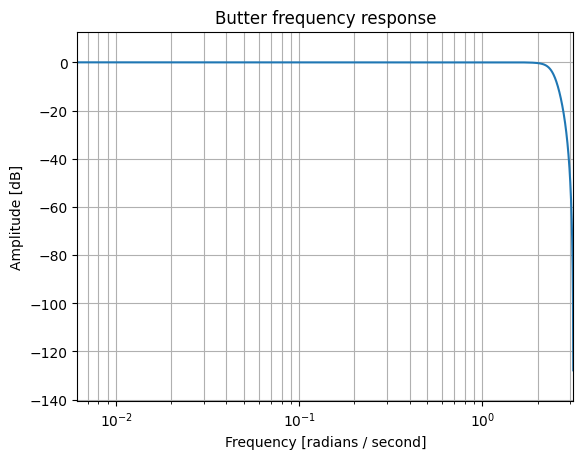

In [273]:
fs = 400
N = 3
rs = 40
wa = 150
b,a = butter(N,wa,btype = 'low',analog = False , fs = fs)
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

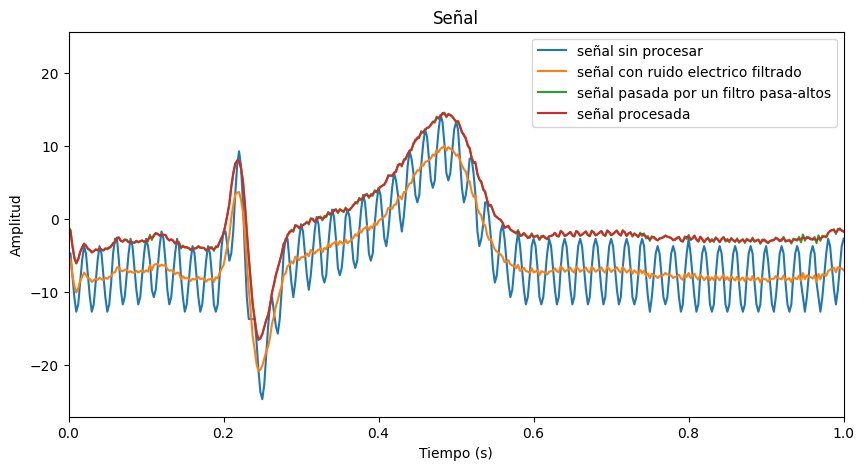

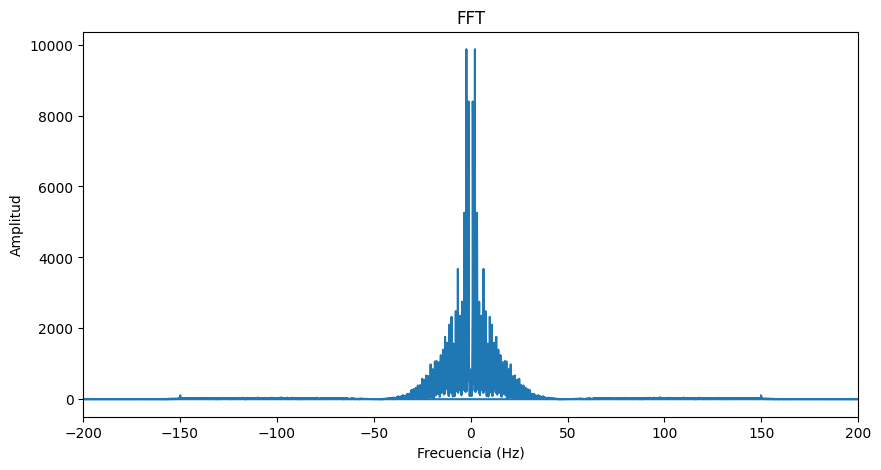

In [274]:
D1_Final = filtfilt(b,a,D1_High)
fft = np.abs(np.fft.fft(D1_Final))
freq_fft = np.fft.fftfreq(len(D1_Final), t[1] - t[0])

# Graficamos
plt.figure(figsize=(10,5))
plt.plot(t,D1,label="señal sin procesar")
plt.plot(t, D1_50Hz,label ="señal con ruido electrico filtrado")
plt.plot(t,D1_High, label = "señal pasada por un filtro pasa-altos")
plt.plot(t,D1_Final,label="señal procesada")
plt.xlim([0,1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(freq_fft, fft)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT')
plt.xlim([-200,200])

plt.show()

Al principio pense que un filtro pasa altos con frecuencia de corte en 150 Hz funcionaria, pero tocando la frecuencia de corte note que si utilizo 50 Hz obtengo una señal mas limpia

#### Fourier Transform

Como bien saben, el análisis de Fourier es un método para expresar una función como una suma de componentes periódicos y para recuperar la señal de esos componentes. Matemáticamente está representada por una ecuación en el mundo de datos continuos, pero como vamos a trabajar en un mundo digital necesitas trabajar por su contraparte discretizada, más bien conocida como la transformada discreta de Fourier (DFT). LA DFT nos permite entonces convertir una señal discreta en el dominio del tiempo a su representación en el dominio de la frecuencia.

La DFT se ha convertido en un pilar muy importante de la computación numérica pero tiene una limitación muy importante que es la eficiencia y la utilización de recursos que conlleva calcularla. Es por eso que en 1965 Cooley y Tukey encontraron un método más "rápido" para calcular la misma información: la transformada rápida de Fourier (Fast Fourier Transform, FFT) $^{[1]}$. La FFT reduce significativamente el número de operaciones matemáticas necesarias para calcular la DFT. Mientras que la DFT calcula la transformación de Fourier de una señal discreta de $N$ puntos utilizando $N^2$ operaciones matemáticas, la FFT reduce significativamente la cantidad de operaciones necesarias para calcular la DFT, en el orden de $N log(N)$ operaciones. Esto hace que la FFT sea mucho más rápida que la DFT para señales largas.

La FFT se basa en una técnica llamada "división y conquista", en la que la señal de entrada se divide en partes más pequeñas y se calculan las Transformadas de Fourier de esas partes, y luego se combinan para obtener la Transformada de Fourier de la señal completa. La FFT también utiliza propiedades matemáticas especiales de la Transformación de Fourier para simplificar aún más los cálculos.

En `scipy` tenemos funciones dentro del módulo `fft` que permiten calcular la [FFT](https://docs.scipy.org/doc/scipy/tutorial/fft.html#fast-fourier-transforms) de una manera muy sencilla.




> [1] Cooley, James W., and John W. Tukey, 1965, “An algorithm for the machine calculation of complex Fourier series,” Math. Comput. 19: 297-301.



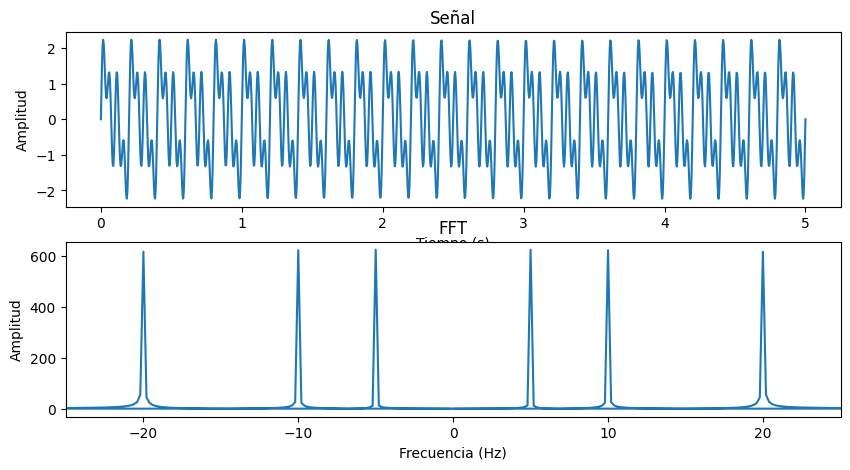

In [275]:

# Señal de prueba compuesta por 3 senos de distintas frecuencias
fs = 250
end = 5
t = np.linspace(0, end, fs*end)
y = np.sin(5*(2*np.pi)*t) + np.sin(10*(2*np.pi)*t) + np.sin(20*(2*np.pi)*t)

# Calculamos la DFT y la FFT de la señal
fft = np.abs(np.fft.fft(y))
freq_fft = np.fft.fftfreq(len(y), t[1] - t[0])

# Graficamos

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 5))

ax0.plot(t, y)
ax0.set_xlabel('Tiempo (s)')
ax0.set_ylabel('Amplitud')
ax0.set_title('Señal')

ax1.plot(freq_fft, fft)
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Amplitud')
ax1.set_title('FFT')
ax1.set_xlim([-25,25])

plt.show()

#### Signal Processing

Este módulo contiene algunas funciones de filtrado, un conjunto limitado de herramientas de diseño de filtros y algunos algoritmos de interpolación B-spline para datos de 1 y 2 dimensiones.

[Documentación](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)

#### Convolución

Se utiliza la función `scipy.signal.convolve()`

[Documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html)



C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_16556\888743944.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


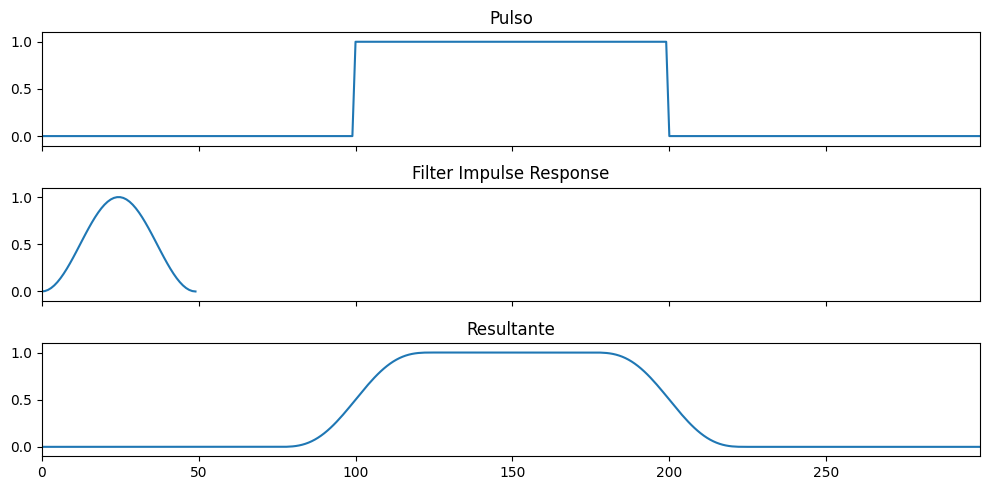

In [276]:


x = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
y = signal.convolve(x, win, mode='same') / sum(win)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(10, 5))
ax0.plot(x)
ax0.set_title('Pulso')
ax0.margins(0, 0.1)

ax1.plot(win)
ax1.set_title('Filter Impulse Response')
ax1.margins(0, 0.1)

ax2.plot(y)
ax2.set_title('Resultante')
ax2.margins(0, 0.1)
fig.tight_layout()
fig.show()

Hagamos énfasis en el parámetro `mode`, ¿qué es lo que hace y cuál es la diferencia entre las 3 opciones que tiene?

In [277]:

s1 = np.array([1, 2, 3, 4])
s2 = np.array([0, 1, 0.5])
print(len(s1))
print(len(s2))

4
3


In [278]:
convolved_signal = convolve(s1, s2, mode='full')
print(convolved_signal)
print(len(convolved_signal))

[0.  1.  2.5 4.  5.5 2. ]
6


In [279]:
convolved_signal = convolve(s1, s2, mode='valid')
print(convolved_signal)
print(len(convolved_signal))

[2.5 4. ]
2


In [280]:
convolved_signal = convolve(s1, s2, mode='same')
print(convolved_signal)
print(len(convolved_signal))

[1.  2.5 4.  5.5]
4


La diferencia es la cantidad de puntos que toma la DFT. En el caso de "full" lo que hace es utilizar zero padding para que ambas longitudes sean iguales y su tamaño es S1 + S2 - 1. En "valid" utiliza los puntos en los cuales coinciden ambos vectores y su tamaño es Max(s1,s2) - min(S1,S2) + 1. Por utlimo el modo same toma el tamaño de la primer señal de entrada, en este caso seria S1.

#### Correlación

Se utiliza la función `scipy.signal.correlate()`

[Documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html)

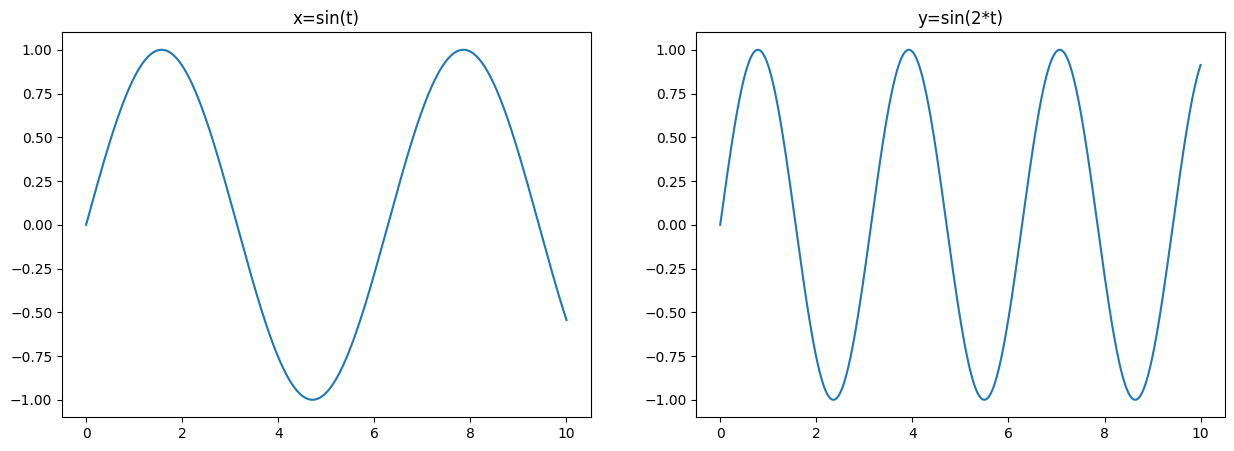

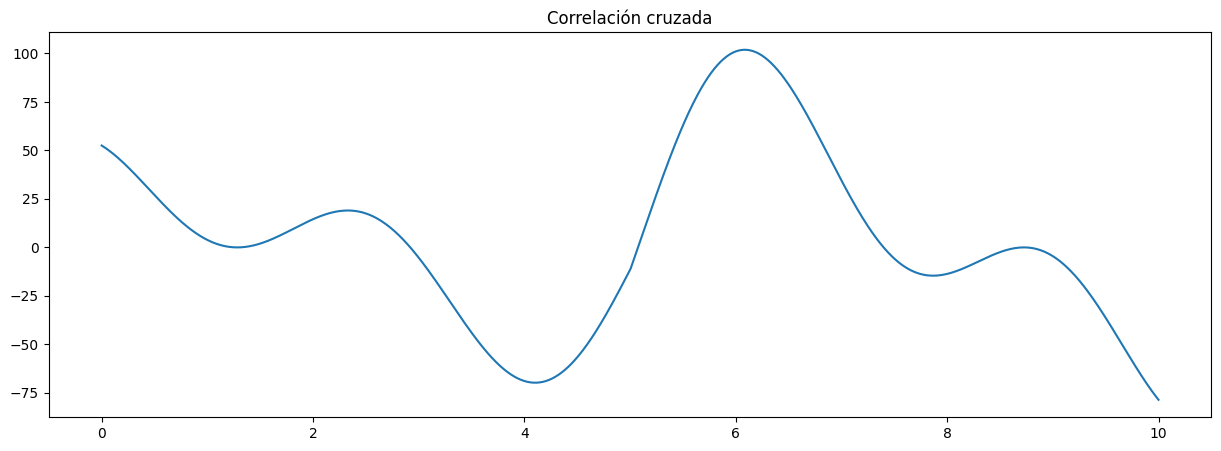

In [281]:

t = np.linspace(0,10,10*100)
x = np.sin(t)
y = np.sin(2*t)

corr = correlate(x, y, 'same')

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.plot(t, x)
ax0.set_title('x=sin(t)')
ax1.plot(t, y)
ax1.set_title('y=sin(2*t)')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t, corr)
plt.title('Correlación cruzada')
plt.show()

La salida de este ejemplo es una gráfico que muestra la señal de correlación cruzada en función del retraso que se geneó; la longitud del resultado final y la ecuación de la correlación sigue el mismo criterio que el de convolución con los posibles valores que puede tomar el parámetro `mode`.

#### Filtros FIR

Para diseñar filtros FIR:

[scipy.signal.firwin()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin)

[scipy.signal.firwin2()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html#scipy.signal.firwin2)

#### Filtros IIR

Para diseñar un filtro IIR:

[scipy.signal.iirfilter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html#scipy.signal.iirfilter)



Para diseñar un filtro IIR con parámetros de una ventana (MATLAB style):

[cheby1()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html#scipy.signal.cheby1)

[cheby2()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html#scipy.signal.cheby2)

[butter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)

Para ejecutar los filtros diseñados:

[lfilter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter)

Para ejecutar los filtros diseñados de manera backward-forward:

[filtfilt()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt)




Para ejecutar lo mismo que antes pero en cascadas de segundo orden:

[sosfilt()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html#scipy.signal.sosfilt)

[sosfiltfilt()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfiltfilt.html#scipy.signal.sosfiltfilt)

Otros filtros importantes:

[iirnotch()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html#scipy.signal.iirnotch)


[iircomb()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iircomb.html#scipy.signal.iircomb)



**Ejemplo:**



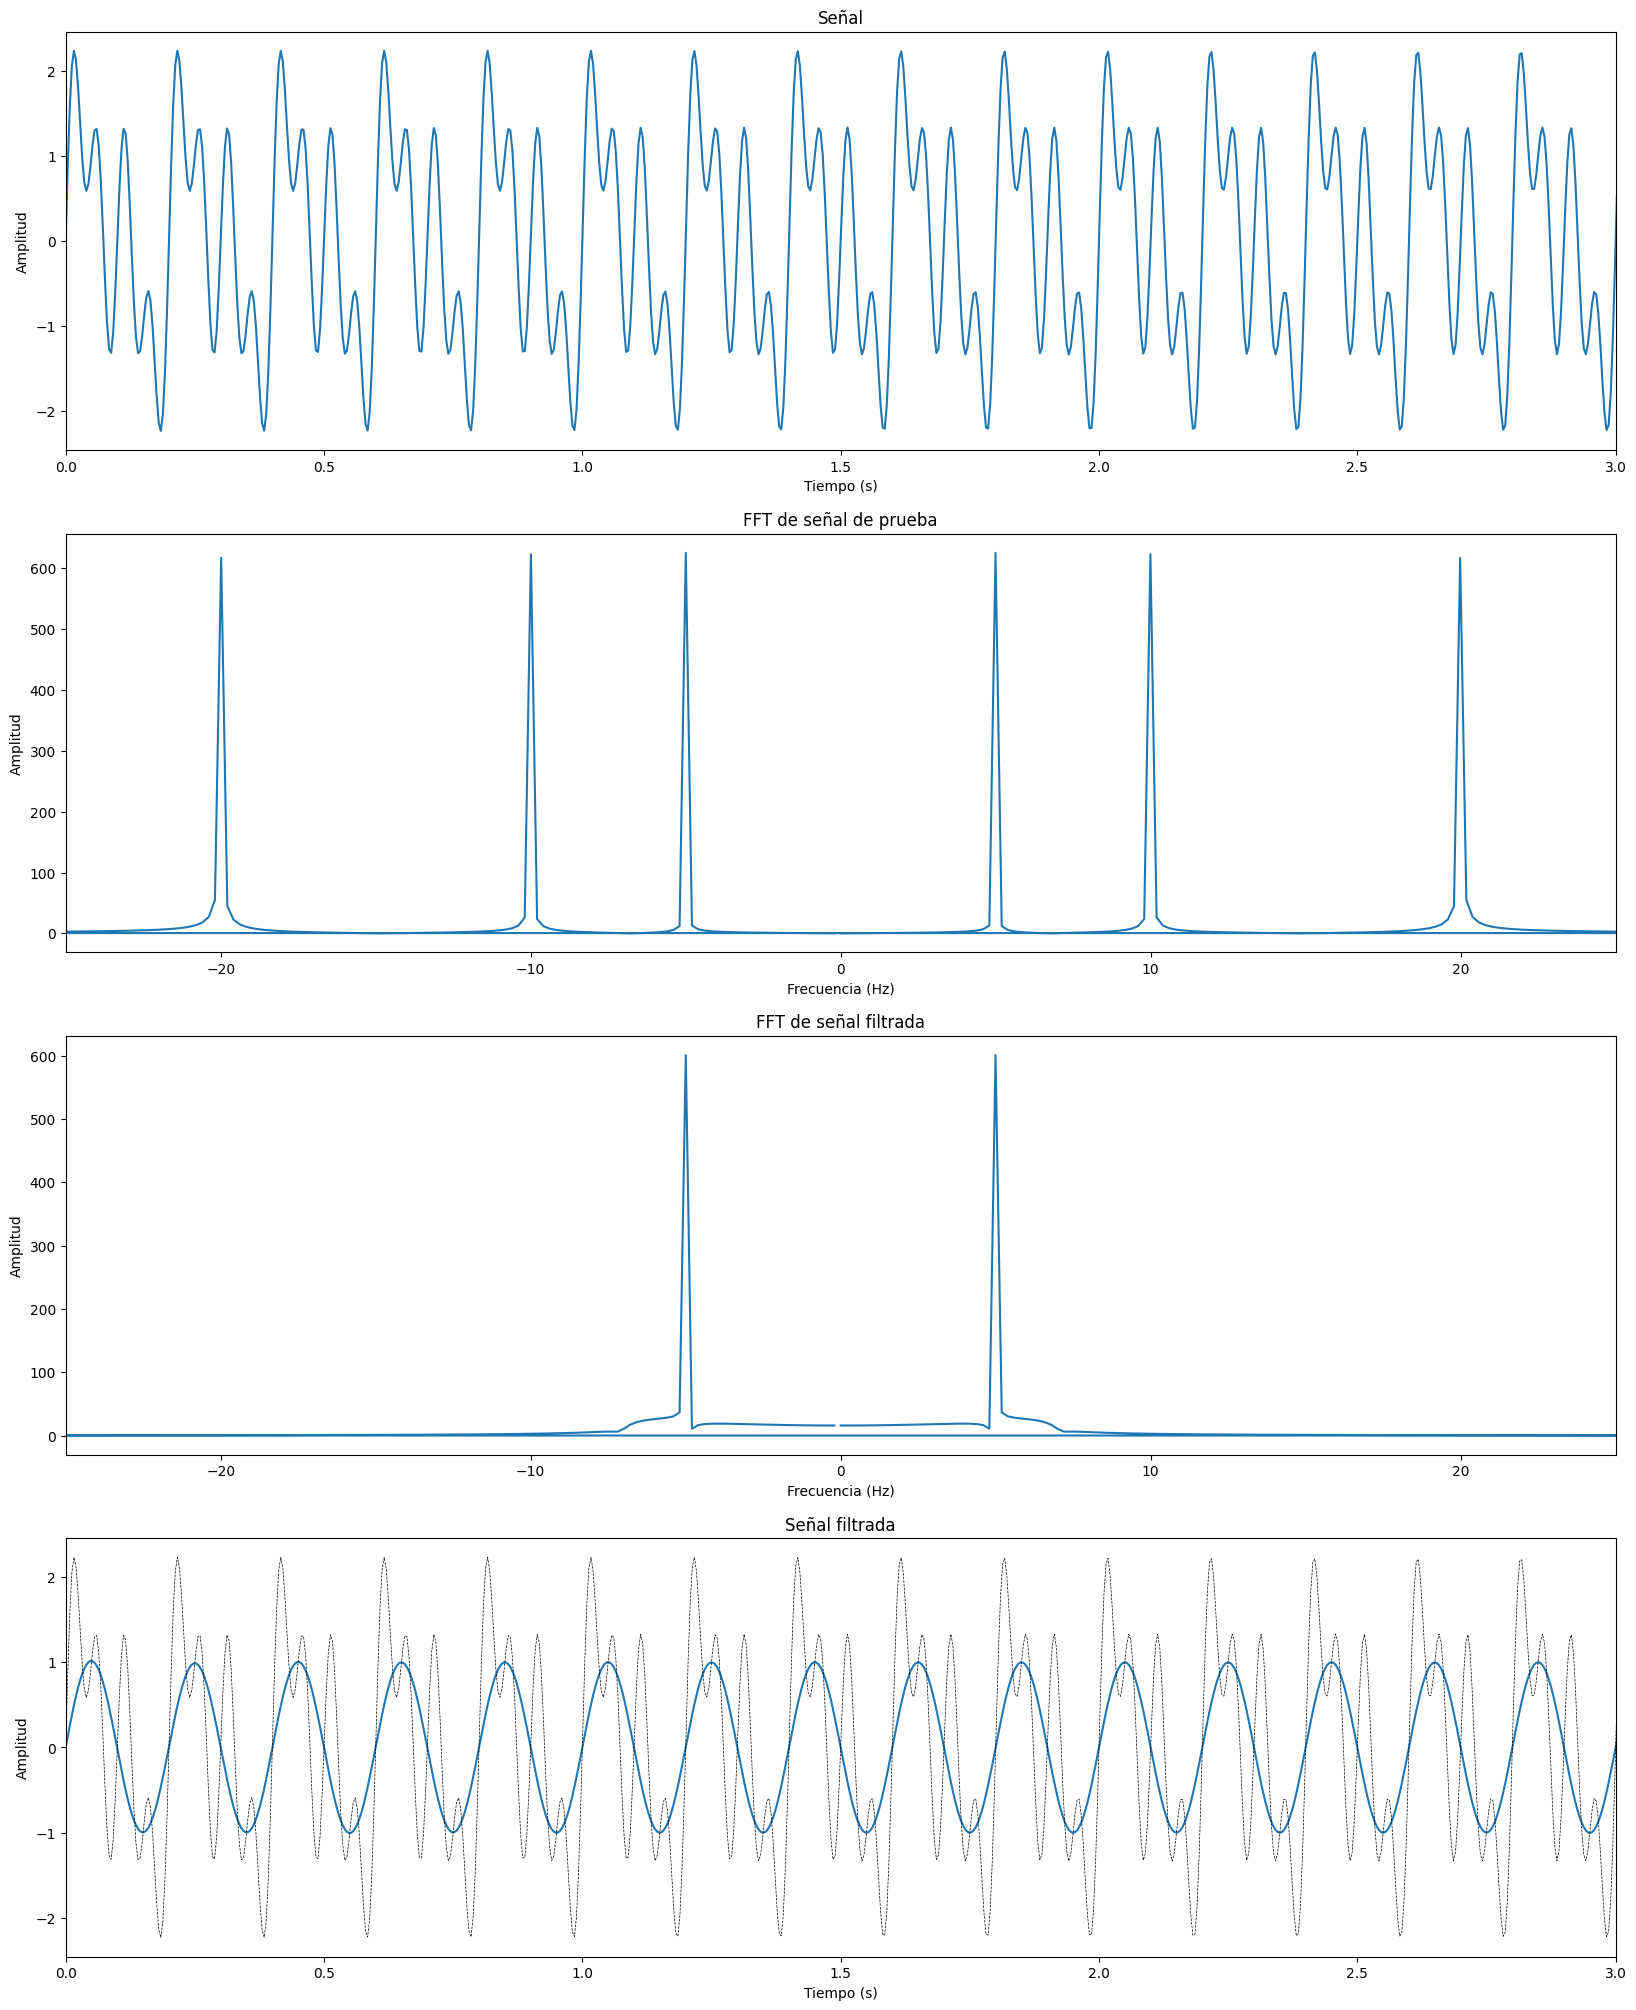

In [282]:
# Señal de prueba compuesta por 3 senos de distintas frecuencias
fs = 250
t = np.linspace(0, 5, fs*5)
x = np.sin(5*(2*np.pi)*t) + np.sin(10*(2*np.pi)*t) + np.sin(20*(2*np.pi)*t)

# Espectro de la señal de prueba
fft = np.abs(np.fft.fft(x))
freq_fft = np.fft.fftfreq(len(x), t[1] - t[0])

# Diseñamos el filtro
Wn = 7
N = 2**5
sos = signal.butter(N, Wn, btype='lowpass', analog=False, output='sos', fs=fs)

# Filtramos la señal
x_filt = signal.sosfiltfilt(sos, x)

# Espectro de la señal filtrada
fft_filt = np.abs(np.fft.fft(x_filt))
freq_fft_filt = np.fft.fftfreq(len(x_filt), t[1] - t[0])

# Graficamos
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(20, 25))

ax0.plot(t, x)
ax0.set_xlabel('Tiempo (s)')
ax0.set_ylabel('Amplitud')
ax0.set_title('Señal')
ax0.set_xlim([0,3])

ax1.plot(freq_fft, fft)
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Amplitud')
ax1.set_title('FFT de señal de prueba')
ax1.set_xlim([-25,25])

ax2.plot(freq_fft_filt, fft_filt)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Amplitud')
ax2.set_title('FFT de señal filtrada')
ax2.set_xlim([-25,25])

ax3.plot(t,x_filt)
ax3.plot(t,x, 'k--', linewidth=0.5)
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('Amplitud')
ax3.set_title('Señal filtrada')
ax3.set_xlim([0,3])

plt.show()

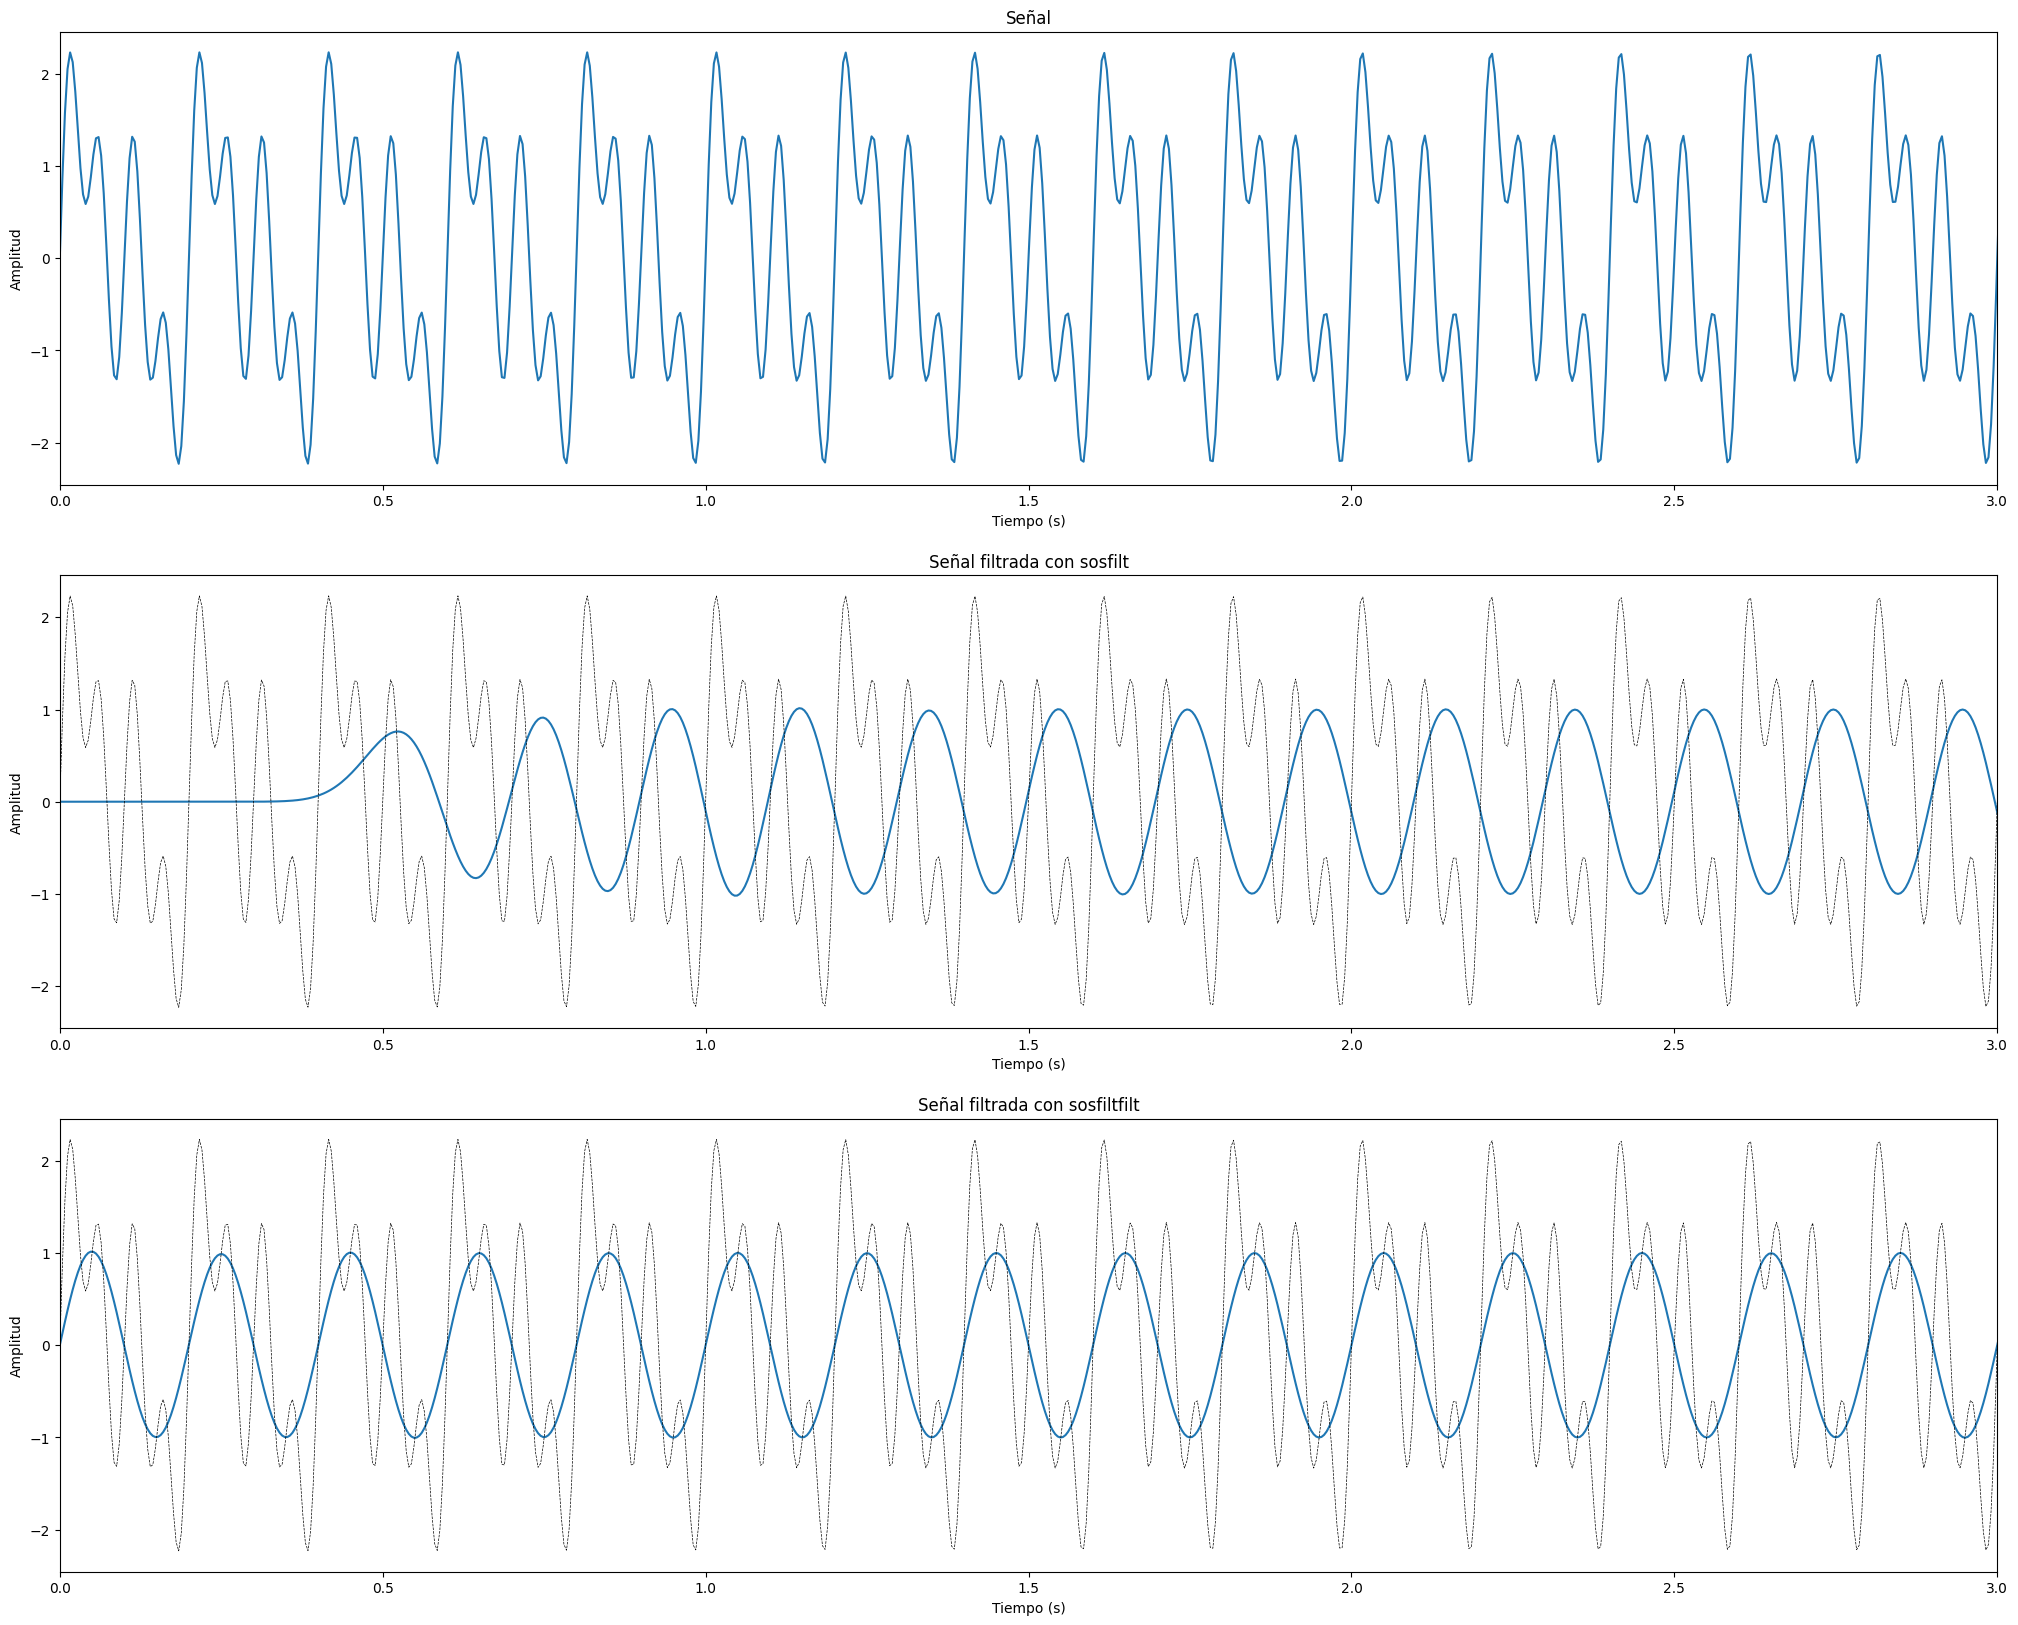

In [283]:
# Señal de prueba compuesta por 3 senos de distintas frecuencias
fs = 250
t = np.linspace(0, 5, fs*5)
x = np.sin(5*(2*np.pi)*t) + np.sin(10*(2*np.pi)*t) + np.sin(20*(2*np.pi)*t)

# Espectro de la señal de prueba
fft = np.abs(np.fft.fft(x))
freq_fft = np.fft.fftfreq(len(x), t[1] - t[0])

# Diseñamos el filtro
Wn = 7
N = 2**5
sos = signal.butter(N, Wn, btype='lowpass', analog=False, output='sos', fs=fs)

# Filtramos la señal
x_sosfiltfilt = signal.sosfiltfilt(sos, x)
x_sosfilt = signal.sosfilt(sos, x)

# Graficamos
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(25, 20))

ax0.plot(t, x)
ax0.set_xlabel('Tiempo (s)')
ax0.set_ylabel('Amplitud')
ax0.set_title('Señal')
ax0.set_xlim([0,3])

ax1.plot(t,x_sosfilt)
ax1.plot(t,x, 'k--', linewidth=0.5)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.set_title('Señal filtrada con sosfilt')
ax1.set_xlim([0,3])

ax2.plot(t,x_sosfiltfilt)
ax2.plot(t,x, 'k--', linewidth=0.5)
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.set_title('Señal filtrada con sosfiltfilt')
ax2.set_xlim([0,3])

plt.show()

#### Spectral Analysis

Sobre esta sección de `scipy.signal` vamos a profundizar en la materia más adelante pero pueden ir viendo su [documentación](https://docs.scipy.org/doc/scipy/reference/signal.html#spectral-analysis)